## Genetic mutation profiles can be used to determine the biological aggressiveness of gliomas.
by Carolina Sanabria (Aug 23, 2023)

In [ ]:
# data libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [ ]:
# data upload and read "Glioblastomas mutations" TCGA
GBMmut = pd.read_csv('/content/TCGA_GBM_LGG_Mutations_all.csv') #, index_col = 0)
GBMmut.head()


,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
# Getting dimensions of the database
GBMmut.shape

(862, 27)

In [ ]:
# Description of the database
GBMmut.describe

<bound method NDFrame.describe of     Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0     LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1     LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2     LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3     LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4     LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   
..    ...       ...           ...     ...                ...   
857   GBM  TCGA-GBM  TCGA-19-5959  Female  77 years 325 days   
858   GBM  TCGA-GBM  TCGA-16-0846    Male   85 years 65 days   
859   GBM  TCGA-GBM  TCGA-28-1746  Female  77 years 178 days   
860   GBM  TCGA-GBM  TCGA-32-2491    Male  63 years 121 days   
861   GBM  TCGA-GBM  TCGA-06-2557    Male  76 years 221 days   

           Primary_Diagnosis                       Race         IDH1  \
0     Oligodendroglioma, NOS                      white      MUTATED   
1               Mixed glioma                      whi

In [ ]:
# Getting data type
GBMmut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [ ]:
names = list(GBMmut)

In [ ]:
names

['Grade',
 'Project',
 'Case_ID',
 'Gender',
 'Age_at_diagnosis',
 'Primary_Diagnosis',
 'Race',
 'IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

In [ ]:
## Dummie variables for gene mutation status

# List of columns to convert
categorical_columns = ['IDH1','TP53','ATRX','PTEN','EGFR','CIC','MUC16','PIK3CA','NF1','PIK3R1','FUBP1','RB1','NOTCH1','BCOR','CSMD3','SMARCA4','GRIN2A','IDH2','FAT4','PDGFRA']

# Mapping for converting categories to 0 and 1
mapping = {'NOT_MUTATED': 0, 'MUTATED': 1}

# Convert categorical columns to 0 and 1
GBMmut[categorical_columns] = GBMmut[categorical_columns].applymap(lambda x: mapping.get(x, x))

# Convert 'Gene mutation columns' column to categorical
#GBMmut[categorical_columns] = GBMmut[categorical_columns].astype('category')

print(GBMmut)



    Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0     LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1     LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2     LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3     LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4     LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   
..    ...       ...           ...     ...                ...   
857   GBM  TCGA-GBM  TCGA-19-5959  Female  77 years 325 days   
858   GBM  TCGA-GBM  TCGA-16-0846    Male   85 years 65 days   
859   GBM  TCGA-GBM  TCGA-28-1746  Female  77 years 178 days   
860   GBM  TCGA-GBM  TCGA-32-2491    Male  63 years 121 days   
861   GBM  TCGA-GBM  TCGA-06-2557    Male  76 years 221 days   

           Primary_Diagnosis                       Race  IDH1  TP53  ATRX  \
0     Oligodendroglioma, NOS                      white     1     0     0   
1               Mixed glioma                      white     1     0     0   


In [ ]:
## Dummie variables for gender

# List of columns to convert
categorical_columns2 = ['Gender']

# Mapping for converting categories to 0 and 1
mapping = {'Male': 0, 'Female': 1}

# Convert categorical columns to 0 and 1
GBMmut[categorical_columns2] = GBMmut[categorical_columns2].applymap(lambda x: mapping.get(x, x))

# Convert 'Gender' column to categorical
#GBMmut[categorical_columns2] = GBMmut[categorical_columns2].astype('category')

print(GBMmut)


    Grade   Project       Case_ID Gender   Age_at_diagnosis  \
0     LGG  TCGA-LGG  TCGA-DU-8164      0  51 years 108 days   
1     LGG  TCGA-LGG  TCGA-QH-A6CY      0  38 years 261 days   
2     LGG  TCGA-LGG  TCGA-HW-A5KM      0   35 years 62 days   
3     LGG  TCGA-LGG  TCGA-E1-A7YE      1  32 years 283 days   
4     LGG  TCGA-LGG  TCGA-S9-A6WG      0  31 years 187 days   
..    ...       ...           ...    ...                ...   
857   GBM  TCGA-GBM  TCGA-19-5959      1  77 years 325 days   
858   GBM  TCGA-GBM  TCGA-16-0846      0   85 years 65 days   
859   GBM  TCGA-GBM  TCGA-28-1746      1  77 years 178 days   
860   GBM  TCGA-GBM  TCGA-32-2491      0  63 years 121 days   
861   GBM  TCGA-GBM  TCGA-06-2557      0  76 years 221 days   

           Primary_Diagnosis                       Race  IDH1  TP53  ATRX  \
0     Oligodendroglioma, NOS                      white     1     0     0   
1               Mixed glioma                      white     1     0     0   
2           

In [ ]:
## get numbers from "Age at diagnosis"
GBMmut["Age_at_diagnosis"] = GBMmut["Age_at_diagnosis"].astype(str).str.extract(r'(\b\d+\b)')
print(GBMmut)

    Grade   Project       Case_ID Gender Age_at_diagnosis  \
0     LGG  TCGA-LGG  TCGA-DU-8164      0               51   
1     LGG  TCGA-LGG  TCGA-QH-A6CY      0               38   
2     LGG  TCGA-LGG  TCGA-HW-A5KM      0               35   
3     LGG  TCGA-LGG  TCGA-E1-A7YE      1               32   
4     LGG  TCGA-LGG  TCGA-S9-A6WG      0               31   
..    ...       ...           ...    ...              ...   
857   GBM  TCGA-GBM  TCGA-19-5959      1               77   
858   GBM  TCGA-GBM  TCGA-16-0846      0               85   
859   GBM  TCGA-GBM  TCGA-28-1746      1               77   
860   GBM  TCGA-GBM  TCGA-32-2491      0               63   
861   GBM  TCGA-GBM  TCGA-06-2557      0               76   

           Primary_Diagnosis                       Race  IDH1  TP53  ATRX  \
0     Oligodendroglioma, NOS                      white     1     0     0   
1               Mixed glioma                      white     1     0     0   
2           Astrocytoma, NOS        

In [ ]:
GBMmut.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,0,51,"Oligodendroglioma, NOS",white,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,LGG,TCGA-LGG,TCGA-QH-A6CY,0,38,Mixed glioma,white,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LGG,TCGA-LGG,TCGA-HW-A5KM,0,35,"Astrocytoma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,LGG,TCGA-LGG,TCGA-E1-A7YE,1,32,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,LGG,TCGA-LGG,TCGA-S9-A6WG,0,31,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#GBMmut["Age_at_diagnosis"] as a continuos variable
GBMmut["Age_at_diagnosis"] = pd.to_numeric(GBMmut["Age_at_diagnosis"])
print (GBMmut.dtypes)

Grade                 object
Project               object
Case_ID               object
Gender                object
Age_at_diagnosis     float64
Primary_Diagnosis     object
Race                  object
IDH1                   int64
TP53                   int64
ATRX                   int64
PTEN                   int64
EGFR                   int64
CIC                    int64
MUC16                  int64
PIK3CA                 int64
NF1                    int64
PIK3R1                 int64
FUBP1                  int64
RB1                    int64
NOTCH1                 int64
BCOR                   int64
CSMD3                  int64
SMARCA4                int64
GRIN2A                 int64
IDH2                   int64
FAT4                   int64
PDGFRA                 int64
dtype: object


In [ ]:
GBMmut.describe()

,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,857.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,50.429405,0.480278,0.410673,0.255220,0.167053,0.132251,0.132251,0.116009,0.089327,0.080046,...,0.054524,0.047564,0.044084,0.033643,0.032483,0.032483,0.031323,0.026682,0.026682,0.025522
std,15.744528,0.499901,0.492242,0.436238,0.373240,0.338960,0.338960,0.320422,0.285381,0.271523,...,0.227181,0.212965,0.205400,0.180412,0.177381,0.177381,0.174289,0.161246,0.161246,0.157796
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import statsmodels.api as sm
from patsy import dmatrices
%matplotlib inline
import numpy as np
from scipy import stats

In [ ]:
# Get the number of cases in each GRADE category
countsGrade = GBMmut.groupby('Grade')['Grade'].agg(len)
countsGrade.name = 'count'

countsGrade

Grade
GBM    363
LGG    499
Name: count, dtype: int64

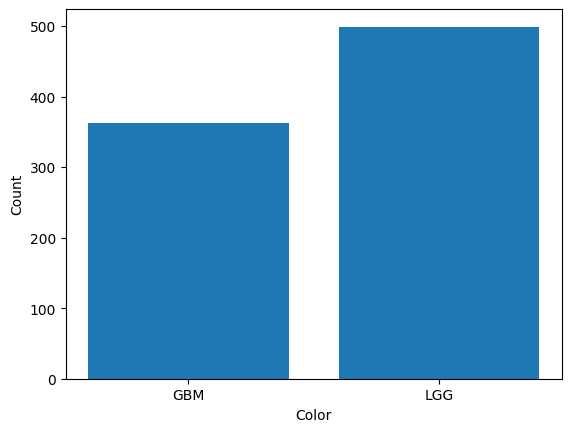

In [ ]:
plt.figure()
plt.bar(countsGrade.index, countsGrade)
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

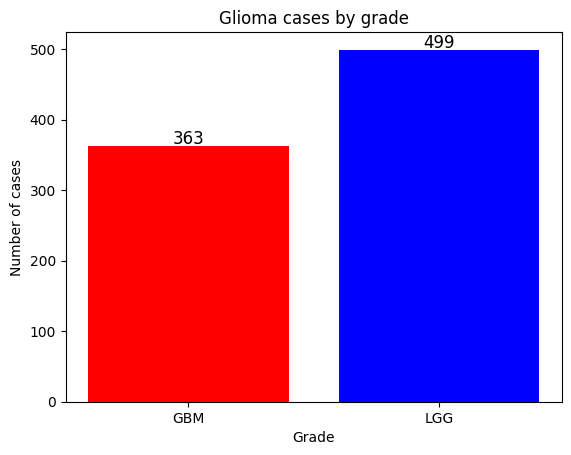

In [ ]:
# Create a barplot with colors by group
plt.figure()
colors = ['red', 'blue']  # Define colors for each group
plt.bar(countsGrade.index, countsGrade, color=colors)

# Add total number counts as text labels on the bars
for x, y in zip(countsGrade.index, countsGrade):
    plt.text(x, y + 3, str(y), ha='center', fontsize=12)

plt.xlabel('Grade')
plt.ylabel('Number of cases')
plt.title('Glioma cases by grade')
plt.show()

In [ ]:
from pickle import TRUE

### GRADE AND GENDER DISTRIBUTION

# Generate a table showing cases by grade and gender
tableGS = pd.crosstab(GBMmut['Grade'], GBMmut['Gender'],margins= TRUE)

print(tableGS)

Gender    0    1  --  All
Grade                    
GBM     222  138   3  363
LGG     277  221   1  499
All     499  359   4  862


<Axes: xlabel='Grade'>

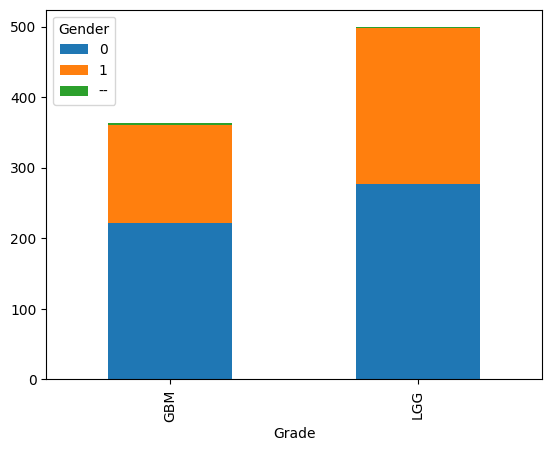

In [ ]:
pd.crosstab(GBMmut['Grade'], GBMmut['Gender']).plot.bar(stacked=True)

In [ ]:
# Convert the crosstab data into a DataFrame
tableGSdf = pd.DataFrame(tableGS)
tableGSdf

Gender,0,1,--,All
Grade,,,,
GBM,222,138,3,363
LGG,277,221,1,499
All,499,359,4,862


In [ ]:
## Get the mean of Age at diagnosis per group "Grade LGG vs GBM"

GBMmut.groupby('Grade')['Age_at_diagnosis'].mean()

Grade
GBM    60.313889
LGG    43.269618
Name: Age_at_diagnosis, dtype: float64

In [ ]:
# General syntax for the 2-sample independent t-test:
# stats.ttest_ind(sampledata_from_group_A, sampledata_from_group_B)

LGG = GBMmut[GBMmut['Grade'] == 'LGG']
GBM = GBMmut[GBMmut['Grade'] == 'GBM']

In [ ]:
# list of values of 'Marks' column || there are na's
marks_list = GBMmut['Age_at_diagnosis'].tolist()
# show the list
print(marks_list)

[51.0, 38.0, 35.0, 32.0, 31.0, 33.0, 35.0, 44.0, 33.0, 87.0, 51.0, 54.0, 52.0, 47.0, 34.0, 40.0, 53.0, 41.0, 43.0, 37.0, 47.0, 31.0, 25.0, 66.0, 56.0, 35.0, 51.0, 37.0, 54.0, 32.0, 65.0, 43.0, 51.0, 43.0, 25.0, 45.0, 50.0, 27.0, 53.0, 46.0, 24.0, nan, 34.0, 29.0, 45.0, 62.0, 46.0, 36.0, 62.0, 70.0, 53.0, 48.0, 40.0, 40.0, 20.0, 57.0, 38.0, 52.0, 56.0, 59.0, 67.0, 48.0, 59.0, 58.0, 27.0, 51.0, 74.0, 52.0, 61.0, 66.0, 42.0, 31.0, 48.0, 33.0, 34.0, 24.0, 55.0, 27.0, 29.0, 39.0, 70.0, 30.0, 39.0, 25.0, 48.0, 57.0, 34.0, 58.0, 55.0, 60.0, 38.0, 56.0, 54.0, 31.0, 54.0, 52.0, 33.0, 42.0, 20.0, 64.0, 29.0, 36.0, 31.0, 35.0, 36.0, 32.0, 38.0, 29.0, 41.0, 35.0, 33.0, 32.0, 49.0, 69.0, 14.0, 33.0, 47.0, 33.0, 63.0, 62.0, 37.0, 53.0, 53.0, 45.0, 33.0, 53.0, 52.0, 64.0, 71.0, 40.0, 36.0, 25.0, 63.0, 40.0, 47.0, 73.0, 24.0, 48.0, 41.0, 36.0, 45.0, 39.0, 44.0, 27.0, 50.0, 42.0, 40.0, 62.0, 33.0, 46.0, 41.0, 47.0, 56.0, 38.0, 60.0, 29.0, 59.0, 44.0, 69.0, 63.0, 43.0, 61.0, 39.0, 31.0, 51.0, 41.0, 60.0

In [ ]:
# Get rows where 'Age_at_diagnosis' contains NaN values
nan_rows = GBMmut[GBMmut['Age_at_diagnosis'].isna()]

print(nan_rows)

    Grade   Project       Case_ID Gender  Age_at_diagnosis  \
41    LGG  TCGA-LGG  TCGA-R8-A6YH     --               NaN   
437   LGG  TCGA-LGG  TCGA-W9-A837      0               NaN   
671   GBM  TCGA-GBM  TCGA-28-2501     --               NaN   
706   GBM  TCGA-GBM  TCGA-28-2510     --               NaN   
794   GBM  TCGA-GBM  TCGA-16-1048     --               NaN   

          Primary_Diagnosis   Race  IDH1  TP53  ATRX  ...  FUBP1  RB1  NOTCH1  \
41                       --     --     1     1     1  ...      0    0       0   
437  Oligodendroglioma, NOS  white     1     0     0  ...      0    0       0   
671                      --     --     0     0     0  ...      0    0       0   
706                      --     --     0     0     0  ...      0    0       0   
794                      --     --     0     0     0  ...      0    0       0   

     BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
41      0      0        0       0     0     0       0  
437     0      0        0   

In [ ]:
nan_rowsDF = GBMmut[GBMmut.isna().any(axis=1)]

print(nan_rowsDF)


    Grade   Project       Case_ID Gender  Age_at_diagnosis  \
41    LGG  TCGA-LGG  TCGA-R8-A6YH     --               NaN   
437   LGG  TCGA-LGG  TCGA-W9-A837      0               NaN   
671   GBM  TCGA-GBM  TCGA-28-2501     --               NaN   
706   GBM  TCGA-GBM  TCGA-28-2510     --               NaN   
794   GBM  TCGA-GBM  TCGA-16-1048     --               NaN   

          Primary_Diagnosis   Race  IDH1  TP53  ATRX  ...  FUBP1  RB1  NOTCH1  \
41                       --     --     1     1     1  ...      0    0       0   
437  Oligodendroglioma, NOS  white     1     0     0  ...      0    0       0   
671                      --     --     0     0     0  ...      0    0       0   
706                      --     --     0     0     0  ...      0    0       0   
794                      --     --     0     0     0  ...      0    0       0   

     BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
41      0      0        0       0     0     0       0  
437     0      0        0   

In [ ]:
#t_statistic, p_value = ttest_ind(lgg_ages, gbm_ages)

stats.ttest_ind(LGG['Age_at_diagnosis'].dropna(), GBM['Age_at_diagnosis'].dropna())


Ttest_indResult(statistic=-18.498308186687957, pvalue=1.6133231292225624e-64)

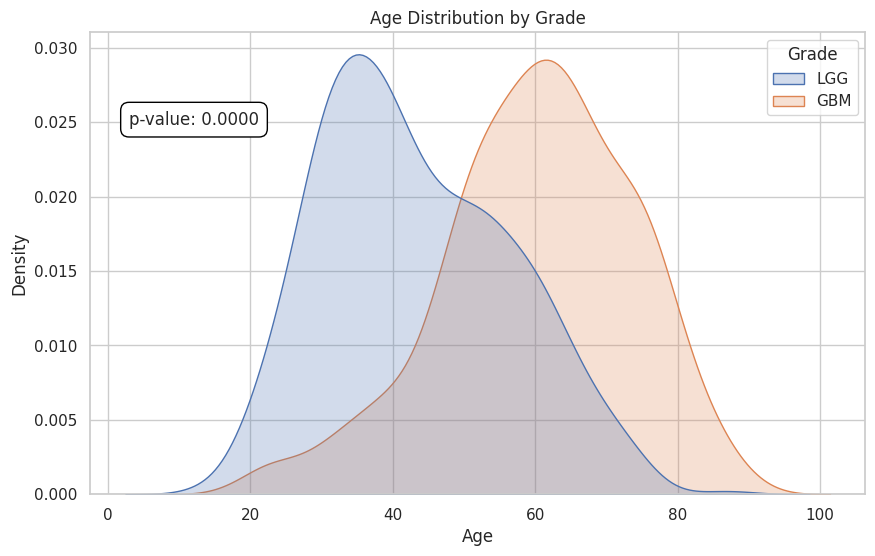

In [ ]:
# Create a density plot using seaborn for Age at diagnosis per group "Grade LGG vs GBM"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=GBMmut, x='Age_at_diagnosis', hue='Grade', fill=True, common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Grade')

# Calculate and display p-value
lgg_ages = GBMmut[GBMmut['Grade'] == 'LGG']['Age_at_diagnosis']
gbm_ages = GBMmut[GBMmut['Grade'] == 'GBM']['Age_at_diagnosis']
t_statistic, p_value = stats.ttest_ind(LGG['Age_at_diagnosis'].dropna(), GBM['Age_at_diagnosis'].dropna())

# Add p-value to the top left of the plot
plt.text(0.05, 0.8, f'p-value: {p_value:.4f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), transform=plt.gca().transAxes)

plt.show()


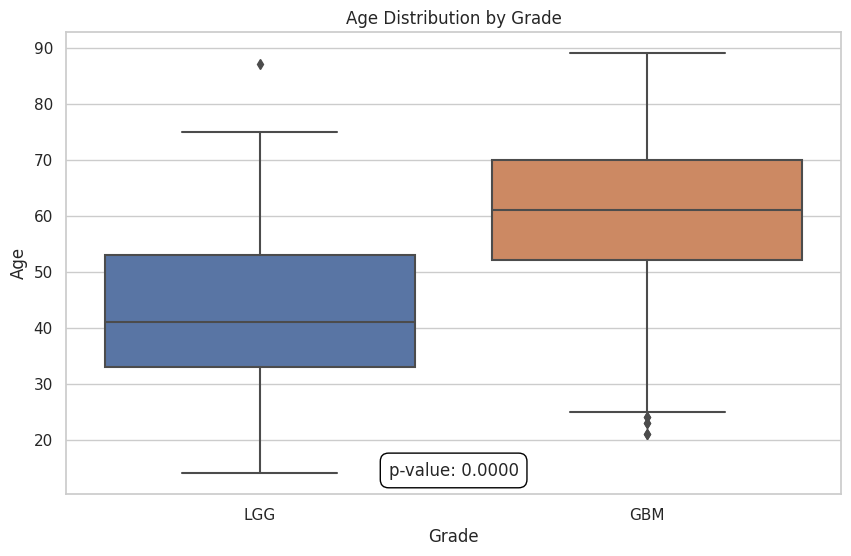

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=GBMmut, x='Grade', y='Age_at_diagnosis')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.title('Age Distribution by Grade')

# Calculate and display p-value
lgg_ages = GBMmut[GBMmut['Grade'] == 'LGG']['Age_at_diagnosis']
gbm_ages = GBMmut[GBMmut['Grade'] == 'GBM']['Age_at_diagnosis']
t_statistic, p_value = stats.ttest_ind(LGG['Age_at_diagnosis'].dropna(), GBM['Age_at_diagnosis'].dropna())
plt.text(0.5, 14.5, f'p-value: {p_value:.4f}', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


In [ ]:
GBMmut.head

<bound method NDFrame.head of     Grade   Project       Case_ID Gender  Age_at_diagnosis  \
0     LGG  TCGA-LGG  TCGA-DU-8164      0              51.0   
1     LGG  TCGA-LGG  TCGA-QH-A6CY      0              38.0   
2     LGG  TCGA-LGG  TCGA-HW-A5KM      0              35.0   
3     LGG  TCGA-LGG  TCGA-E1-A7YE      1              32.0   
4     LGG  TCGA-LGG  TCGA-S9-A6WG      0              31.0   
..    ...       ...           ...    ...               ...   
857   GBM  TCGA-GBM  TCGA-19-5959      1              77.0   
858   GBM  TCGA-GBM  TCGA-16-0846      0              85.0   
859   GBM  TCGA-GBM  TCGA-28-1746      1              77.0   
860   GBM  TCGA-GBM  TCGA-32-2491      0              63.0   
861   GBM  TCGA-GBM  TCGA-06-2557      0              76.0   

           Primary_Diagnosis                       Race  IDH1  TP53  ATRX  \
0     Oligodendroglioma, NOS                      white     1     0     0   
1               Mixed glioma                      white     1     0    

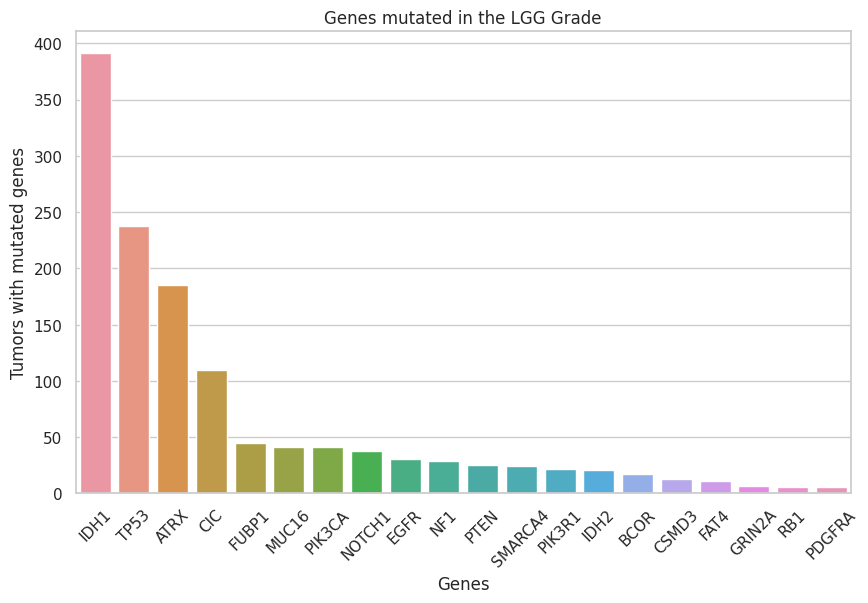

In [ ]:
## Barplot of the most common mutations found in the TCGA cases with LGG

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only LGG group data
lgg_df = LGG  # Replace this with your actual DataFrame containing LGG group data

# List of categorical columns
categorical_columns = ['IDH1','TP53','ATRX','PTEN','EGFR','CIC','MUC16','PIK3CA','NF1','PIK3R1','FUBP1','RB1','NOTCH1','BCOR','CSMD3','SMARCA4','GRIN2A','IDH2','FAT4','PDGFRA']

# Calculate the count of value 1 in each categorical column
count_ones = lgg_df[categorical_columns].sum()

# Sort the count values in descending order
count_ones_sorted = count_ones.sort_values(ascending=False)

# Create a bar plot to visualize the count of value 1 in each categorical column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=count_ones_sorted.index, y=count_ones_sorted.values)
plt.xlabel('Genes')
plt.ylabel('Tumors with mutated genes')
plt.title('Genes mutated in the LGG Grade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

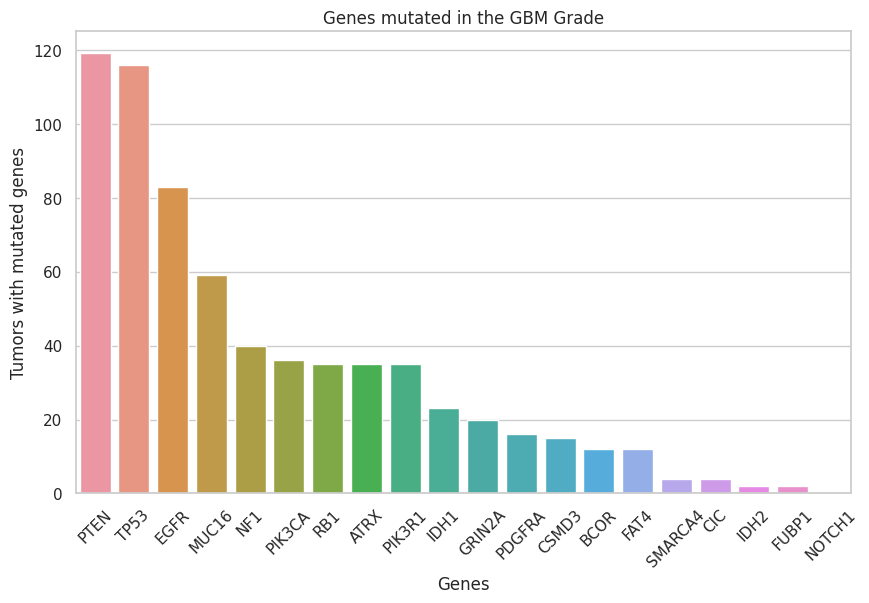

In [ ]:
## Barplot of the most common mutations found in the TCGA cases with GBM


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only GBM group data
gbm_df = GBM  # Replace this with your actual DataFrame containing GBM group data

# List of categorical columns
categorical_columns = ['IDH1','TP53','ATRX','PTEN','EGFR','CIC','MUC16','PIK3CA','NF1','PIK3R1','FUBP1','RB1','NOTCH1','BCOR','CSMD3','SMARCA4','GRIN2A','IDH2','FAT4','PDGFRA']

# Calculate the count of value 1 in each categorical column
count_ones1 = gbm_df[categorical_columns].sum()

# Sort the count values in descending order
count_ones1_sorted = count_ones1.sort_values(ascending=False)

# Create a bar plot to visualize the count of value 1 in each categorical column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=count_ones1_sorted.index, y=count_ones1_sorted.values)
plt.xlabel('Genes')
plt.ylabel('Tumors with mutated genes')
plt.title('Genes mutated in the GBM Grade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

In [ ]:
count_ones

IDH1       391
TP53       238
ATRX       185
PTEN        25
EGFR        31
CIC        110
MUC16       41
PIK3CA      41
NF1         29
PIK3R1      22
FUBP1       45
RB1          6
NOTCH1      38
BCOR        17
CSMD3       13
SMARCA4     24
GRIN2A       7
IDH2        21
FAT4        11
PDGFRA       6
dtype: int64

In [ ]:
count_ones1

IDH1        23
TP53       116
ATRX        35
PTEN       119
EGFR        83
CIC          4
MUC16       59
PIK3CA      36
NF1         40
PIK3R1      35
FUBP1        2
RB1         35
NOTCH1       0
BCOR        12
CSMD3       15
SMARCA4      4
GRIN2A      20
IDH2         2
FAT4        12
PDGFRA      16
dtype: int64

# New Section

### **Comparing the mutation frequency between LGG vs GBM**

In [ ]:
# LGG data
data_lgg = pd.DataFrame(list(count_ones.items()),columns=['Gene', 'Count'])

data_lgg

,Gene,Count
0,IDH1,391
1,TP53,238
2,ATRX,185
3,PTEN,25
4,EGFR,31
5,CIC,110
6,MUC16,41
7,PIK3CA,41
8,NF1,29
9,PIK3R1,22


In [ ]:
# GBM data
data_gbm = pd.DataFrame(list(count_ones1.items()),columns=['Gene', 'Count'])

data_gbm


,Gene,Count
0,IDH1,23
1,TP53,116
2,ATRX,35
3,PTEN,119
4,EGFR,83
5,CIC,4
6,MUC16,59
7,PIK3CA,36
8,NF1,40
9,PIK3R1,35


In [ ]:
#example => pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer')
pd.merge(data_lgg, data_gbm, on='Gene', how='outer', suffixes=('LGG', 'GBM'))

,Gene,CountLGG,CountGBM
0,IDH1,391,23
1,TP53,238,116
2,ATRX,185,35
3,PTEN,25,119
4,EGFR,31,83
5,CIC,110,4
6,MUC16,41,59
7,PIK3CA,41,36
8,NF1,29,40
9,PIK3R1,22,35


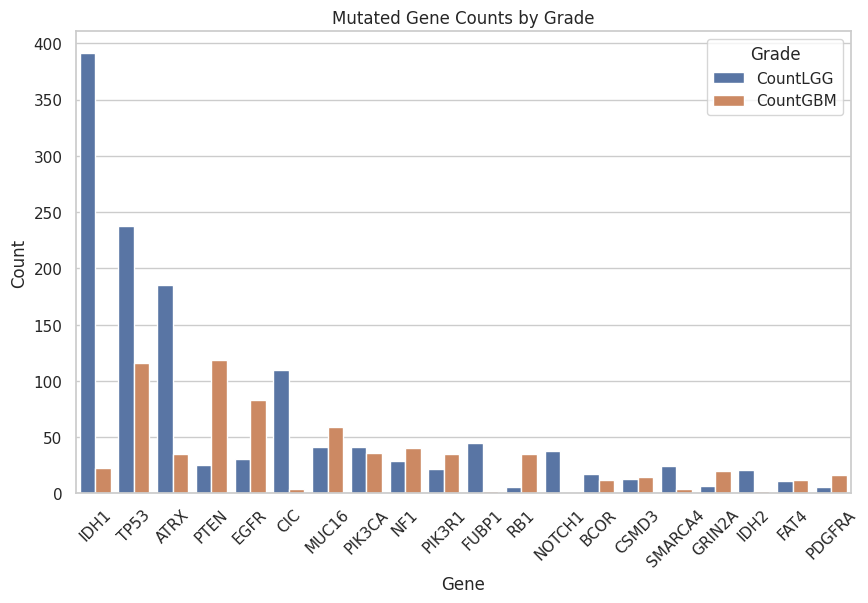

In [ ]:
dfmerge = pd.merge(data_lgg, data_gbm, on='Gene', how='outer', suffixes=('LGG', 'GBM'))

# Melt the DataFrame to have a single 'Count' column
melted_df = pd.melt(dfmerge, id_vars='Gene', value_vars=['CountLGG', 'CountGBM'], var_name='Grade', value_name='Count')

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Gene', y='Count', hue='Grade')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.title('Mutated Gene Counts by Grade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Grade')

plt.show()

In [ ]:
combined_data = pd.concat([data_lgg, data_gbm], keys=['LGG', 'GBM'], names=['Group'])
combined_data

Gene  Count
Group                   
LGG   0      IDH1    391
      1      TP53    238
      2      ATRX    185
      3      PTEN     25
      4      EGFR     31
      5       CIC    110
      6     MUC16     41
      7    PIK3CA     41
      8       NF1     29
      9    PIK3R1     22
      10    FUBP1     45
      11      RB1      6
      12   NOTCH1     38
      13     BCOR     17
      14    CSMD3     13
      15  SMARCA4     24
      16   GRIN2A      7
      17     IDH2     21
      18     FAT4     11
      19   PDGFRA      6
GBM   0      IDH1     23
      1      TP53    116
      2      ATRX     35
      3      PTEN    119
      4      EGFR     83
      5       CIC      4
      6     MUC16     59
      7    PIK3CA     36
      8       NF1     40
      9    PIK3R1     35
      10    FUBP1      2
      11      RB1     35
      12   NOTCH1      0
      13     BCOR     12
      14    CSMD3     15
      15  SMARCA4      4
      16   GRIN2A     20
      17     IDH2      2
      18     FAT4     12
      19   PDGFRA     16

In [ ]:
# Use the gene mutation count data per each Grade to compare the mutation frequency between both groups LGG vs GBM

# Perform crosstabulation
crosstab_data = pd.crosstab(index=combined_data.index.get_level_values('Group'),
                            columns=combined_data['Gene'],
                            values=combined_data['Count'],
                            aggfunc='sum')

print(crosstab_data)


Gene   ATRX  BCOR  CIC  CSMD3  EGFR  FAT4  FUBP1  GRIN2A  IDH1  IDH2  MUC16  \
row_0                                                                         
GBM      35    12    4     15    83    12      2      20    23     2     59   
LGG     185    17  110     13    31    11     45       7   391    21     41   

Gene   NF1  NOTCH1  PDGFRA  PIK3CA  PIK3R1  PTEN  RB1  SMARCA4  TP53  
row_0                                                                 
GBM     40       0      16      36      35   119   35        4   116  
LGG     29      38       6      41      22    25    6       24   238  


In [ ]:
res = stats.chi2_contingency(crosstab_data)
res

Chi2ContingencyResult(statistic=668.648091223471, pvalue=1.5662946471068376e-129, dof=19, expected_freq=array([[ 74.63687151,   9.8384967 ,  38.67546978,   9.49923819,
         38.67546978,   7.80294566,  15.94514982,   9.15997969,
        140.45302184,   7.80294566,  33.92585069,  23.40883697,
         12.89182326,   7.46368715,  26.12290503,  19.33773489,
         48.85322499,  13.90959878,   9.49923819, 120.09751143],
       [145.36312849,  19.1615033 ,  75.32453022,  18.50076181,
         75.32453022,  15.19705434,  31.05485018,  17.84002031,
        273.54697816,  15.19705434,  66.07414931,  45.59116303,
         25.10817674,  14.53631285,  50.87709497,  37.66226511,
         95.14677501,  27.09040122,  18.50076181, 233.90248857]]))

In [ ]:
res.statistic


668.648091223471

In [ ]:
res.pvalue

1.5662946471068376e-129

### **Logistic Regressions to determine the genes that discriminate better between the gliomas' grade groups (LGG vs GBM)**

Overall, the accuracy, confusion_matrix and AUC-ROC results obtained after performing logistic regression to discriminate between GBM (GBM = 1) vs LLG (LGG = 0), per gene (univariate), shows that the majority of the genes can discriminate between having GBM (not LGG) vs not having GBM (cases with LGG).

The gene with poorer performance is IDH1 (accuracy 0.77; AUC 0.84 for each class; GBM True Positive (TP): 54 cases; GBM False Negative (FN): 22 cases).

For all the other genes the performance is better. Accuracy 0.86; AUC 0.89-0.91; GBM True Positives (TP): 71-72 cases; GBM False Negative (FN): 4-5.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#GBMmut.head
#dT_GBMmut = pd.DataFrame(GBMmut)
#dT_GBMmut = dT_GBMmut.filter(['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA','Grade'])

In [ ]:
lg_GBMmut = pd.DataFrame(GBMmut)

In [ ]:
lg_GBMmut = lg_GBMmut.filter(['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA','Grade'])

In [ ]:
lg_GBMmut.head

<bound method NDFrame.head of      IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  PIK3CA  NF1  PIK3R1  ...  RB1  \
0       1     0     0     0     0    0      0       1    0       0  ...    0   
1       1     0     0     0     0    1      0       0    0       0  ...    0   
2       1     1     1     0     0    0      0       0    0       0  ...    0   
3       1     1     1     0     0    0      1       0    0       1  ...    0   
4       1     1     1     0     0    0      0       0    0       0  ...    0   
..    ...   ...   ...   ...   ...  ...    ...     ...  ...     ...  ...  ...   
857     0     0     0     1     0    0      0       0    0       0  ...    0   
858     0     1     0     1     0    0      0       0    0       0  ...    0   
859     0     1     0     1     0    0      0       0    0       0  ...    0   
860     0     1     0     0     0    0      1       1    0       0  ...    1   
861     0     0     0     0     0    0      0       0    0       0  ...    0   

     NOTC

In [ ]:
# List of genes
genes = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

# Loop over each gene
for gene in genes:
    # Splitting the data into features (X) and target (y)
    X = lg_GBMmut.drop([gene, 'Grade'], axis=1)
    y = lg_GBMmut['Grade']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a Logistic Regression classifier
    classifier = LogisticRegression(random_state=42)

    # Training the classifier
    classifier.fit(X_train, y_train)

    # Making predictions on the test set
    predictions = classifier.predict(X_test)

    # Evaluating the accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for {gene}: {accuracy:.2f}")
    print(f"Prediction for {gene}: {predictions}")

    # Print coefficients and intercept
    print(f"Gene: {gene}")
    print("Coefficients:", classifier.coef_)
    print("Intercept:", classifier.intercept_)
    print()

Accuracy for IDH1: 0.77
Prediction for IDH1: [1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1
 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0]
Gene: IDH1
Coefficients: [[-0.23226046 -1.60262912  1.51503256  0.64375842 -2.89470334  0.59380405
   0.42160613  0.32702174  0.83807804 -1.0841499   1.41332536 -1.71270418
   0.30716377  0.28019831 -0.83091336  1.01581549 -1.29236466  0.23448348
   1.12728527]]
Intercept: [-0.17490792]

Accuracy for TP53: 0.86
Prediction for TP53: [1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0

Confusion matrix for IDH1: [[80 17]
 [22 54]]
Confusion matrix for TP53: [[77 20]
 [ 5 71]]
Confusion matrix for ATRX: [[77 20]
 [ 4 72]]
Confusion matrix for PTEN: [[77 20]
 [ 5 71]]
Confusion matrix for EGFR: [[77 20]
 [ 5 71]]
Confusion matrix for CIC: [[77 20]
 [ 4 72]]
Confusion matrix for MUC16: [[77 20]
 [ 5 71]]
Confusion matrix for PIK3CA: [[77 20]
 [ 4 72]]
Confusion matrix for NF1: [[77 20]
 [ 5 71]]
Confusion matrix for PIK3R1: [[77 20]
 [ 4 72]]
Confusion matrix for FUBP1: [[77 20]
 [ 5 71]]
Confusion matrix for RB1: [[77 20]
 [ 4 72]]
Confusion matrix for NOTCH1: [[77 20]
 [ 5 71]]
Confusion matrix for BCOR: [[77 20]
 [ 4 72]]
Confusion matrix for CSMD3: [[77 20]
 [ 5 71]]
Confusion matrix for SMARCA4: [[77 20]
 [ 5 71]]
Confusion matrix for GRIN2A: [[77 20]
 [ 5 71]]
Confusion matrix for IDH2: [[77 20]
 [ 5 71]]
Confusion matrix for FAT4: [[77 20]
 [ 5 71]]
Confusion matrix for PDGFRA: [[77 20]
 [ 4 72]]


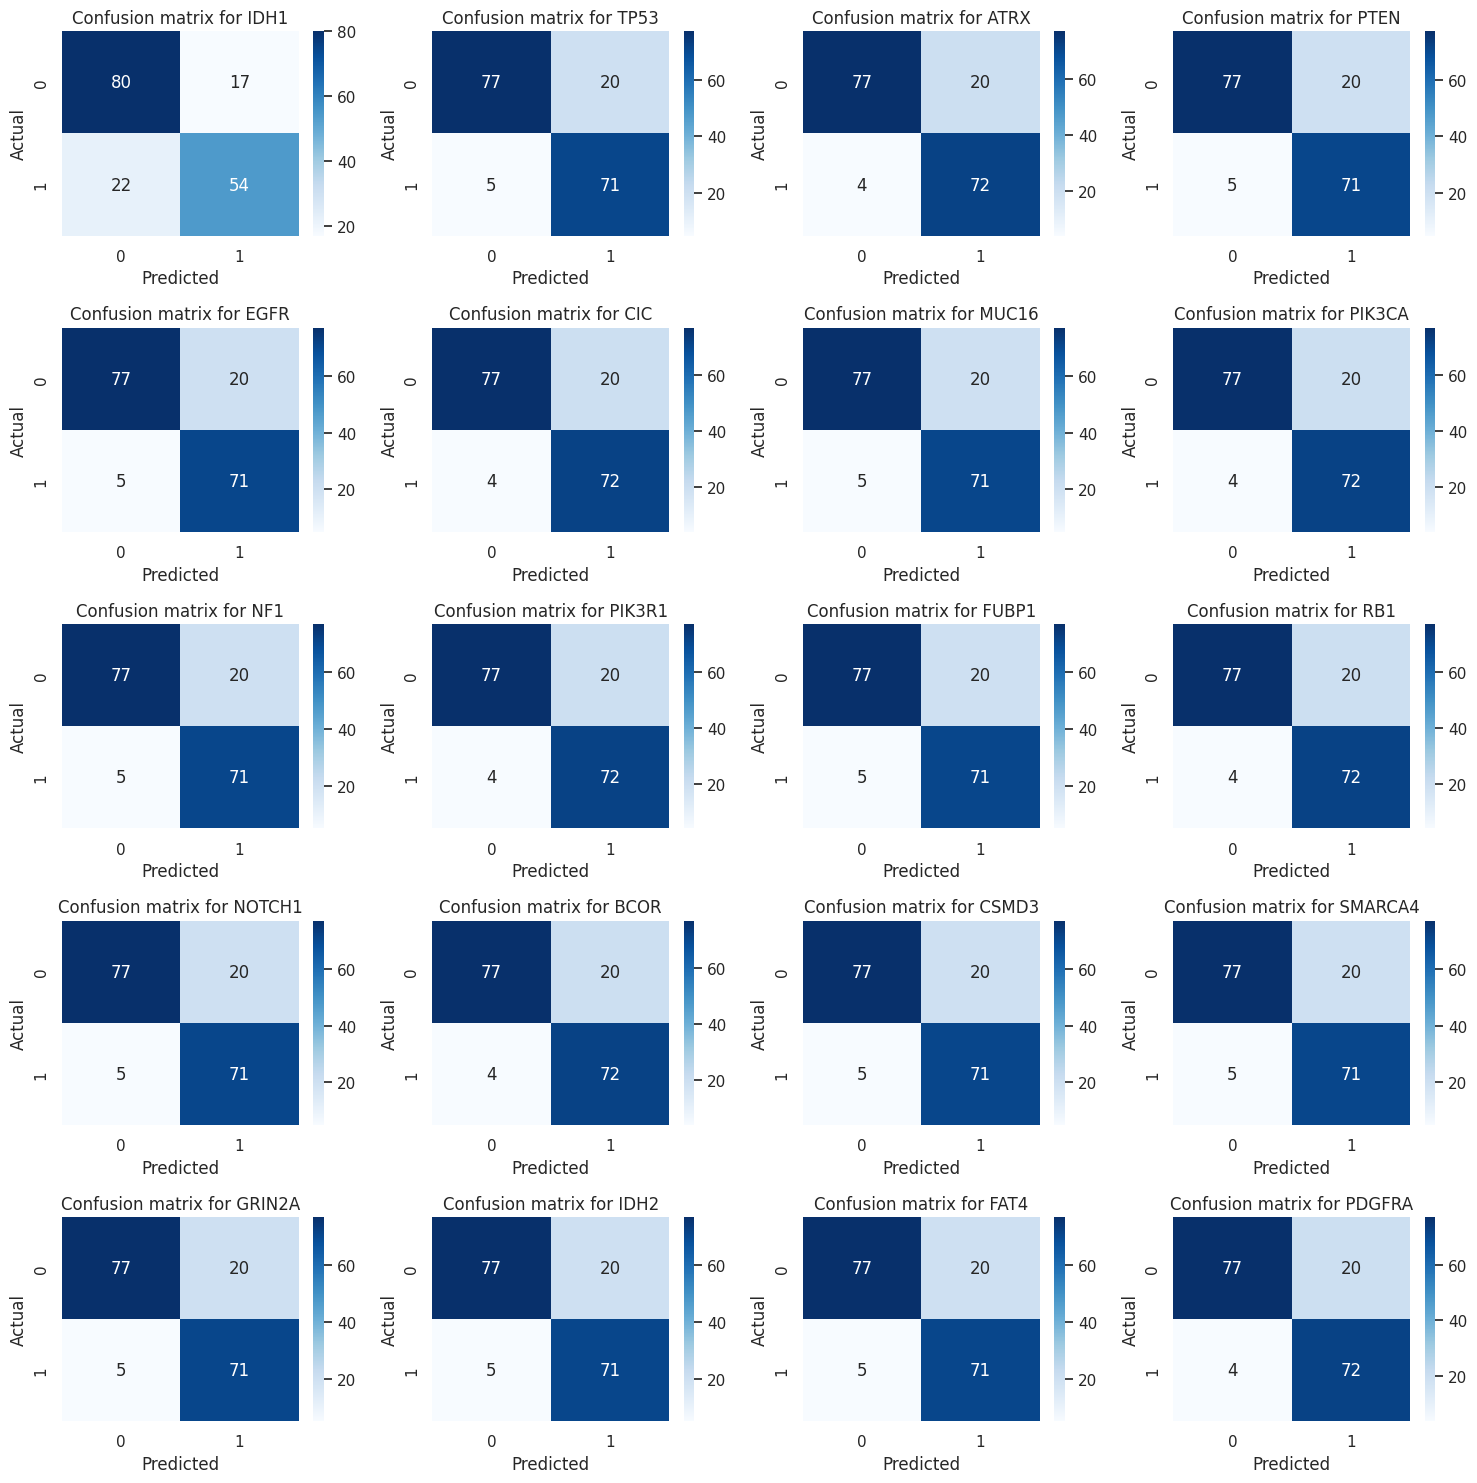

In [ ]:
from sklearn.metrics import confusion_matrix

# List of genes
genes = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']


# Create subplots for the confusion matrices
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over each gene
for i, gene in enumerate(genes):
    # Splitting the data into features (X) and target (y)
    X = lg_GBMmut.drop([gene, 'Grade'], axis=1)
    y = lg_GBMmut['Grade']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a Logistic Regression classifier
    classifier = LogisticRegression(random_state=42)

    # Training the classifier
    classifier.fit(X_train, y_train)

    # Making predictions on the test set
    predictions = classifier.predict(X_test)

    # Getting the confusion_matrix per gene
    confusionMatrix = confusion_matrix(y_test, predictions)
    print(f"Confusion matrix for {gene}: {confusionMatrix}")

    # Calculate the confusion matrix
    #cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap for the confusion matrix
    ax = axes[i // num_cols, i % num_cols]
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion matrix for {gene}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()



In [ ]:
## Dummie variables for Grade

# List of columns to convert
categorical_columns3 = ['Grade']

# Mapping for converting categories to 0 and 1
mapping = {'LGG': 0, 'GBM': 1}

# Convert categorical columns to 0 and 1
lg_GBMmut[categorical_columns3] = lg_GBMmut[categorical_columns3].applymap(lambda x: mapping.get(x, x))

# Convert 'Gender' column to categorical
#GBMmut[categorical_columns2] = GBMmut[categorical_columns2].astype('category')

print(lg_GBMmut)

     IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  PIK3CA  NF1  PIK3R1  ...  RB1  \
0       1     0     0     0     0    0      0       1    0       0  ...    0   
1       1     0     0     0     0    1      0       0    0       0  ...    0   
2       1     1     1     0     0    0      0       0    0       0  ...    0   
3       1     1     1     0     0    0      1       0    0       1  ...    0   
4       1     1     1     0     0    0      0       0    0       0  ...    0   
..    ...   ...   ...   ...   ...  ...    ...     ...  ...     ...  ...  ...   
857     0     0     0     1     0    0      0       0    0       0  ...    0   
858     0     1     0     1     0    0      0       0    0       0  ...    0   
859     0     1     0     1     0    0      0       0    0       0  ...    0   
860     0     1     0     0     0    0      1       1    0       0  ...    1   
861     0     0     0     0     0    0      0       0    0       0  ...    0   

     NOTCH1  BCOR  CSMD3  SMARCA4  GRIN

Testing gene: IDH1
AUC for IDH1: 0.84
Testing gene: TP53
AUC for TP53: 0.91
Testing gene: ATRX
AUC for ATRX: 0.90
Testing gene: PTEN
AUC for PTEN: 0.90
Testing gene: EGFR
AUC for EGFR: 0.90
Testing gene: CIC
AUC for CIC: 0.90
Testing gene: MUC16
AUC for MUC16: 0.90
Testing gene: PIK3CA
AUC for PIK3CA: 0.90
Testing gene: NF1
AUC for NF1: 0.89
Testing gene: PIK3R1
AUC for PIK3R1: 0.89
Testing gene: FUBP1
AUC for FUBP1: 0.90
Testing gene: RB1
AUC for RB1: 0.90
Testing gene: NOTCH1
AUC for NOTCH1: 0.89
Testing gene: BCOR
AUC for BCOR: 0.90
Testing gene: CSMD3
AUC for CSMD3: 0.90
Testing gene: SMARCA4
AUC for SMARCA4: 0.90
Testing gene: GRIN2A
AUC for GRIN2A: 0.90
Testing gene: IDH2
AUC for IDH2: 0.89
Testing gene: FAT4
AUC for FAT4: 0.90
Testing gene: PDGFRA
AUC for PDGFRA: 0.90


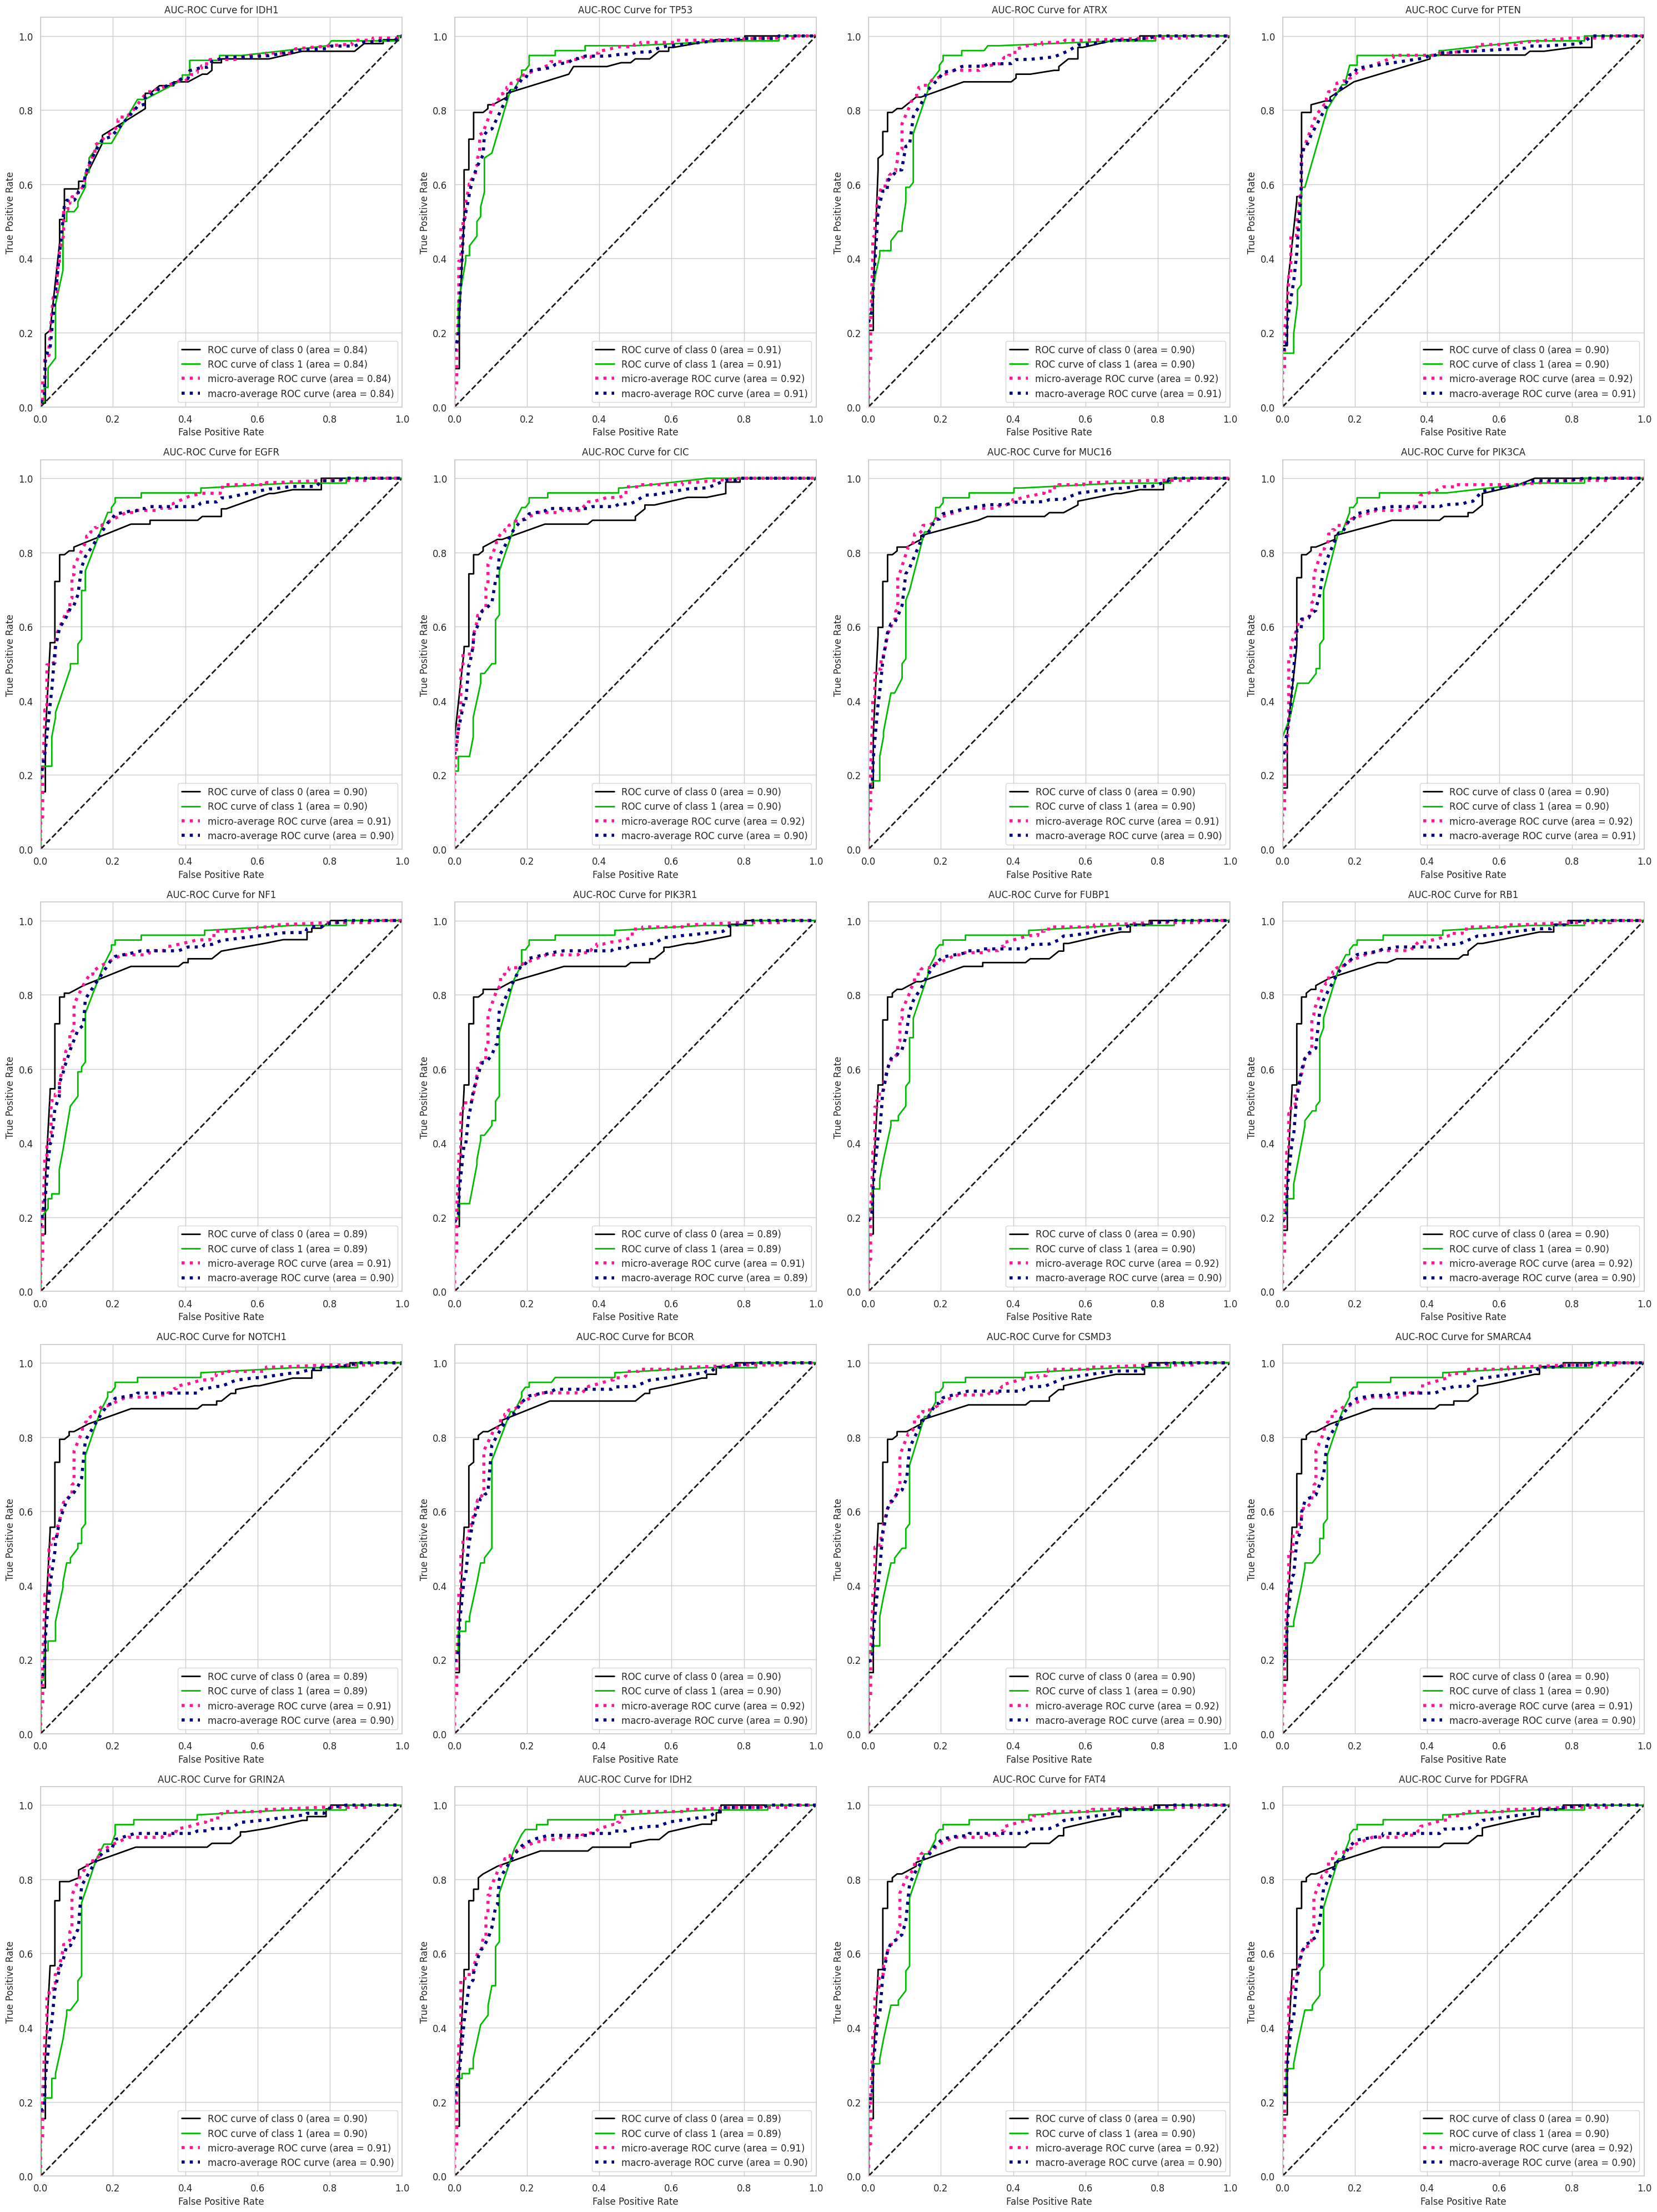

In [ ]:
!pip install scikit-plot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

# List of genes
genes = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

# Create a subplot to hold multiple plots
fig, axs = plt.subplots(5, 4, figsize=(30, 40))
axs = axs.ravel()

for i, gene in enumerate(genes):
    print(f"Testing gene: {gene}")

    # Splitting the data into features (X) and target (y)
    X = lg_GBMmut.drop([gene, 'Grade'], axis=1)
    y = lg_GBMmut['Grade']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a Logistic Regression classifier
    classifier = LogisticRegression(random_state=42)

    # Training the classifier
    classifier.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

    # Plot AUC-ROC curve on the respective subplot
    skplt.metrics.plot_roc(y_test, classifier.predict_proba(X_test), ax=axs[i])
    axs[i].set_title(f'AUC-ROC Curve for {gene}')

    # Calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC for {gene}: {auc:.2f}")


# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as an image file
plt.savefig('auc_roc_curves_PerGene.png')

# Show the plots
plt.show()



### ***MACHINE LEARNING USING DECISION TREE AND RANDOM FOREST***

In [ ]:
from sklearn import tree

GBMmut.head

<bound method NDFrame.head of     Grade   Project       Case_ID Gender  Age_at_diagnosis  \
0     LGG  TCGA-LGG  TCGA-DU-8164      0              51.0   
1     LGG  TCGA-LGG  TCGA-QH-A6CY      0              38.0   
2     LGG  TCGA-LGG  TCGA-HW-A5KM      0              35.0   
3     LGG  TCGA-LGG  TCGA-E1-A7YE      1              32.0   
4     LGG  TCGA-LGG  TCGA-S9-A6WG      0              31.0   
..    ...       ...           ...    ...               ...   
857   GBM  TCGA-GBM  TCGA-19-5959      1              77.0   
858   GBM  TCGA-GBM  TCGA-16-0846      0              85.0   
859   GBM  TCGA-GBM  TCGA-28-1746      1              77.0   
860   GBM  TCGA-GBM  TCGA-32-2491      0              63.0   
861   GBM  TCGA-GBM  TCGA-06-2557      0              76.0   

           Primary_Diagnosis                       Race  IDH1  TP53  ATRX  \
0     Oligodendroglioma, NOS                      white     1     0     0   
1               Mixed glioma                      white     1     0    

In [ ]:
#index_add = GBMmut['Primary_Diagnosis']
dT_GBMmut = pd.DataFrame(GBMmut)

In [ ]:
dT_GBMmut

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,0,51.0,"Oligodendroglioma, NOS",white,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,LGG,TCGA-LGG,TCGA-QH-A6CY,0,38.0,Mixed glioma,white,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LGG,TCGA-LGG,TCGA-HW-A5KM,0,35.0,"Astrocytoma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,LGG,TCGA-LGG,TCGA-E1-A7YE,1,32.0,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,LGG,TCGA-LGG,TCGA-S9-A6WG,0,31.0,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,1,77.0,Glioblastoma,white,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858,GBM,TCGA-GBM,TCGA-16-0846,0,85.0,Glioblastoma,white,0,1,0,...,0,0,0,0,0,0,0,0,0,0
859,GBM,TCGA-GBM,TCGA-28-1746,1,77.0,Glioblastoma,white,0,1,0,...,0,0,0,0,0,0,0,0,0,0
860,GBM,TCGA-GBM,TCGA-32-2491,0,63.0,Glioblastoma,white,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
dT_GBMmut = dT_GBMmut.set_index('Primary_Diagnosis', drop = False)
dT_GBMmut

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Primary_Diagnosis,,,,,,,,,,,,,,,,,,,,,
"Oligodendroglioma, NOS",LGG,TCGA-LGG,TCGA-DU-8164,0,51.0,"Oligodendroglioma, NOS",white,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Mixed glioma,LGG,TCGA-LGG,TCGA-QH-A6CY,0,38.0,Mixed glioma,white,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"Astrocytoma, NOS",LGG,TCGA-LGG,TCGA-HW-A5KM,0,35.0,"Astrocytoma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
"Astrocytoma, anaplastic",LGG,TCGA-LGG,TCGA-E1-A7YE,1,32.0,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,1,0
"Astrocytoma, anaplastic",LGG,TCGA-LGG,TCGA-S9-A6WG,0,31.0,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glioblastoma,GBM,TCGA-GBM,TCGA-19-5959,1,77.0,Glioblastoma,white,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Glioblastoma,GBM,TCGA-GBM,TCGA-16-0846,0,85.0,Glioblastoma,white,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Glioblastoma,GBM,TCGA-GBM,TCGA-28-1746,1,77.0,Glioblastoma,white,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dT_GBMmut = dT_GBMmut.filter(['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA','Grade'])

In [ ]:
dT_GBMmut.head

<bound method NDFrame.head of                          IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  PIK3CA  \
Primary_Diagnosis                                                           
Oligodendroglioma, NOS      1     0     0     0     0    0      0       1   
Mixed glioma                1     0     0     0     0    1      0       0   
Astrocytoma, NOS            1     1     1     0     0    0      0       0   
Astrocytoma, anaplastic     1     1     1     0     0    0      1       0   
Astrocytoma, anaplastic     1     1     1     0     0    0      0       0   
...                       ...   ...   ...   ...   ...  ...    ...     ...   
Glioblastoma                0     0     0     1     0    0      0       0   
Glioblastoma                0     1     0     1     0    0      0       0   
Glioblastoma                0     1     0     1     0    0      0       0   
Glioblastoma                0     1     0     0     0    0      1       1   
Glioblastoma                0     0     0     

In [ ]:
# Split our data into X and y
X1 = dT_GBMmut.iloc[:, :-1] # every column except the last one
y1 = dT_GBMmut['Grade']

In [ ]:
X1

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Primary_Diagnosis,,,,,,,,,,,,,,,,,,,,
"Oligodendroglioma, NOS",1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
Mixed glioma,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Astrocytoma, NOS",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Astrocytoma, anaplastic",1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
"Astrocytoma, anaplastic",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glioblastoma,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Glioblastoma,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Glioblastoma,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y1

Primary_Diagnosis
Oligodendroglioma, NOS     LGG
Mixed glioma               LGG
Astrocytoma, NOS           LGG
Astrocytoma, anaplastic    LGG
Astrocytoma, anaplastic    LGG
                          ... 
Glioblastoma               GBM
Glioblastoma               GBM
Glioblastoma               GBM
Glioblastoma               GBM
Glioblastoma               GBM
Name: Grade, Length: 862, dtype: object

In [ ]:
# Split the data into train and test
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, random_state=42)

In [ ]:
# get your model based on train data
gliomas = tree.DecisionTreeClassifier(max_depth=5)
gliomas.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn import metrics

# We use the model to predict the test_encoded data
test_pred_class = gliomas.predict(X1_test)

print(metrics.accuracy_score(y1_test, test_pred_class))

0.8611111111111112


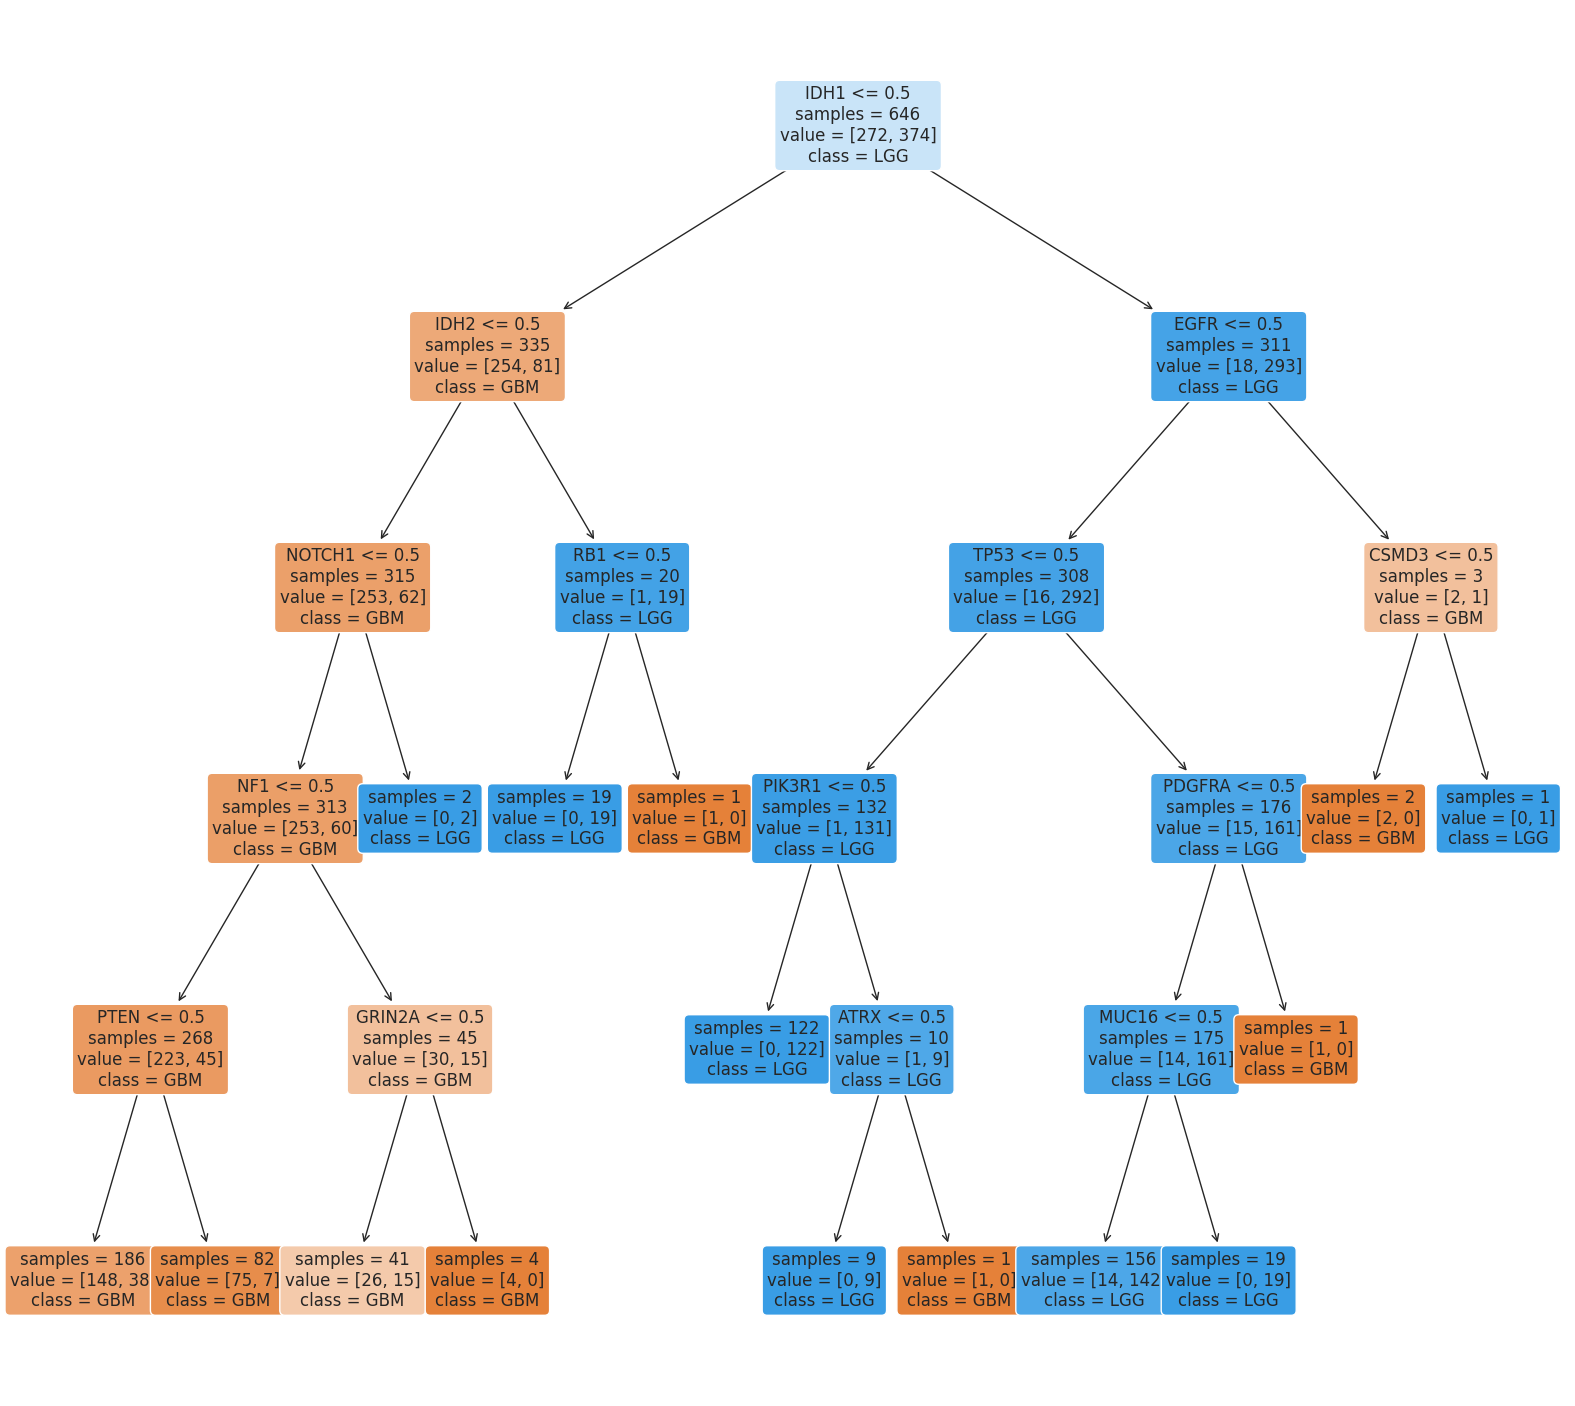

In [ ]:
from sklearn.tree import plot_tree

# size for our tree figure
fig, ax = plt.subplots(figsize=(20, 18))

# Use sklearn's plot_tree() function
plot_tree(gliomas,
          feature_names = X1.columns,
          class_names = ['GBM', 'LGG'],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12)

# Save the plot as an image
plt.savefig('decision_tree_Gliomas.png')

# Display the plot
plt.show()


In [ ]:
conf_matrixGliomas = metrics.confusion_matrix(y1_test, test_pred_class, labels=['GBM', 'LGG'])
pd.DataFrame(conf_matrixGliomas,
             index = ['actual GBM', 'actual LGG'],
            columns= ['predicted GBM', 'predicted LGG'])

,predicted GBM,predicted LGG
actual GBM,85,6
actual LGG,24,101


## When the max_depth value is around 5, the test accuracy reaches its highest point. Overall, the accuracy was high for both train and test data.

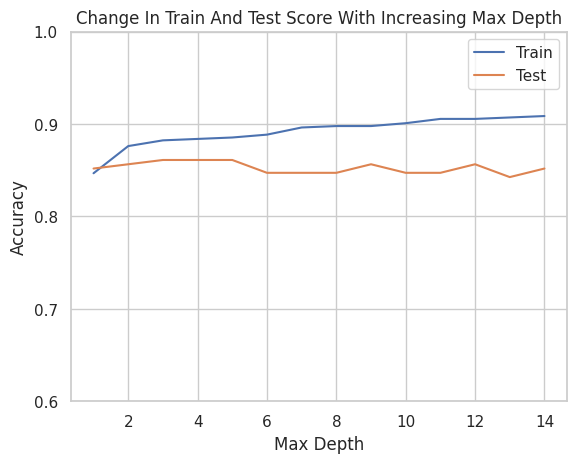

In [ ]:
# Define a range of depth values to try
depth_values = range(1, 15)

# Create placeholder lists to append our scores to
train_scores = []
test_scores = []


# Loop through each depth value
for d in depth_values:

    # Create and fit a decision tree with that depth
    gliomas2 = tree.DecisionTreeClassifier(max_depth=d)
    gliomas2.fit(X1_train, y1_train)

    # Calculate train and test accuracies
    train_acc = gliomas2.score(X1_train, y1_train)
    test_acc = gliomas2.score(X1_test, y1_test)

    # Append them to our lists
    train_scores.append(train_acc)
    test_scores.append(test_acc)



# Let's plot this out

plt.figure()
plt.plot(depth_values, train_scores, label='Train')
plt.plot(depth_values, test_scores, label='Test')
plt.title("Change in train and test score with increasing Max Depth".title())
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

# Set y-axis ticks and labels
plt.yticks([0, 0.6, 0.7, 0.8, 0.9, 1.0])

plt.ylim(0.6, 1)  # Set y-axis limits

plt.show()


### **RANDOM FOREST - MACHINE LEARNING**

In [ ]:
# Split our data into X and y
X1 = dT_GBMmut.iloc[:, :-1] # every column except the last one
y1 = dT_GBMmut['Grade']


# Split the data into train and test
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=3, min_samples_split=100, bootstrap=False)
clf.fit(X1_train, y1_train)
print(f"training score: {clf.score(X1_train, y1_train)}")
print(f"test score: {clf.score(X1_test, y1_test)}")

training score: 0.8869969040247678
test score: 0.8425925925925926


In [ ]:
print(len(clf.estimators_))
y1 = clf.estimators_[0]

3


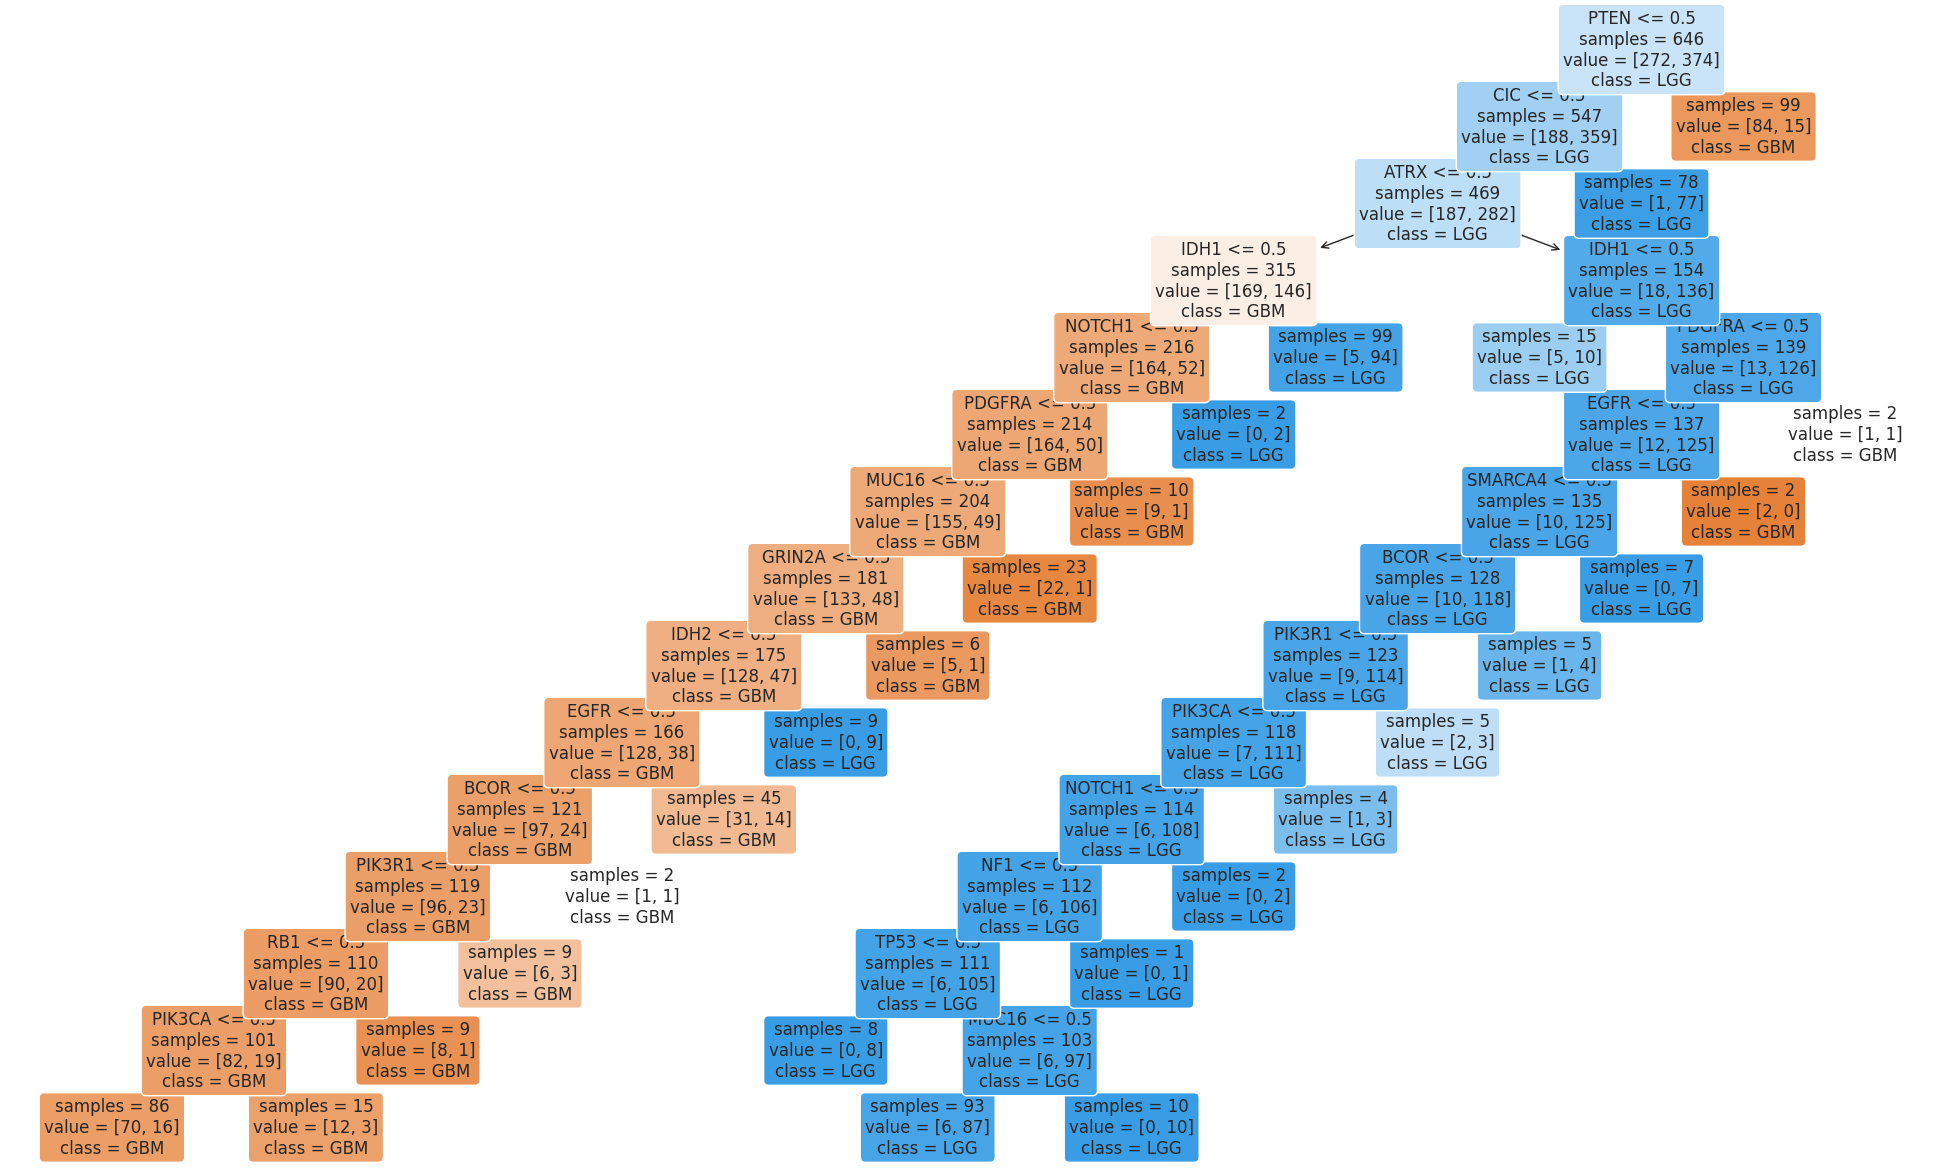

In [ ]:
from sklearn.tree import plot_tree

# size for our tree figure
fig, ax = plt.subplots(figsize=(25, 15))

# Use sklearn's plot_tree() function
plot_tree(y1,
          feature_names=X1.columns,
          class_names=['GBM', 'LGG'],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12)


# Save the plot as an image
plt.savefig('RandomForest_Gliomas.png')

# Display the plot
plt.show()

In [ ]:
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [5.98192712e-01 6.34910630e-03 6.84114465e-02 8.51866130e-02
 7.72605349e-02 1.55412919e-02 9.15902089e-03 5.59712765e-03
 2.46000774e-03 4.85891372e-03 1.19167907e-02 3.62013134e-03
 1.01222037e-02 4.60875305e-03 3.39982737e-04 3.02056501e-03
 2.32606277e-04 8.32510722e-02 2.26268962e-03 7.60843097e-03]


In [ ]:
import pandas as pd

# Given feature importances and genes list
feature_importances = [5.98192712e-01, 6.34910630e-03, 6.84114465e-02, 8.51866130e-02,
                       7.72605349e-02, 1.55412919e-02, 9.15902089e-03, 5.59712765e-03,
                       2.46000774e-03, 4.85891372e-03, 1.19167907e-02, 3.62013134e-03,
                       1.01222037e-02, 4.60875305e-03, 3.39982737e-04, 3.02056501e-03,
                       2.32606277e-04, 8.32510722e-02, 2.26268962e-03, 7.60843097e-03]

genes = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1',
         'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Genes': genes, 'Feature_Importances': feature_importances})

# Print the DataFrame
print(feature_importance_df)



      Genes  Feature_Importances
0      IDH1             0.598193
1      TP53             0.006349
2      ATRX             0.068411
3      PTEN             0.085187
4      EGFR             0.077261
5       CIC             0.015541
6     MUC16             0.009159
7    PIK3CA             0.005597
8       NF1             0.002460
9    PIK3R1             0.004859
10    FUBP1             0.011917
11      RB1             0.003620
12   NOTCH1             0.010122
13     BCOR             0.004609
14    CSMD3             0.000340
15  SMARCA4             0.003021
16   GRIN2A             0.000233
17     IDH2             0.083251
18     FAT4             0.002263
19   PDGFRA             0.007608


### **This is the clean data that the UC Irvine Machine Learning Repository also provided. I used it nly as a guide to format my data at the begining of this session.**

In [ ]:
# data upload and read "Glioblastomas grade" TCGA
GBMgrade = pd.read_csv('/content/TCGA_InfoWithGrade.csv') #, index_col = 0)
GBMgrade.head()